#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0714 21:17:16.322703 10824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0714 21:17:16.867903 10824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 21:17:16.941707 10824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
model.add(Dropout(rate=0.25))

W0714 21:17:17.172091 10824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0714 21:17:17.257862 10824 deprecation.py:506] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0714 21:17:17.372556 10824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 






Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 149s 4ms/step - loss: 1.3436 - acc: 0.5184 - val_loss: 1.4446 - val_acc: 0.5320
Epoch 2/12
37500/37500 [==============================] - 139s 4ms/step - loss: 1.3223 - acc: 0.5285 - val_loss: 1.3897 - val_acc: 0.5498
Epoch 3/12
37500/37500 [==============================] - 146s 4ms/step - loss: 1.2961 - acc: 0.5403 - val_loss: 1.3435 - val_acc: 0.5546
Epoch 4/12
37500/37500 [==============================] - 145s 4ms/step - loss: 1.2784 - acc: 0.5458 - val_loss: 1.3228 - val_acc: 0.5723
Epoch 5/12
37500/37500 [==============================] - 150s 4ms/step - loss: 1.2523 - acc: 0.5559 - val_loss: 1.3081 - val_acc: 0.5735
Epoch 6/12
37500/37500 [==============================] - 151s 4ms/step - loss: 1.2316 - acc: 0.5636 - val_loss: 1.2861 - val_acc: 0.5754
Epoch 7/12
37500/37500 [==============================] - 141s 4ms/step - loss: 1.2204 - acc: 0.5663 - val_loss: 1.2831 - 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

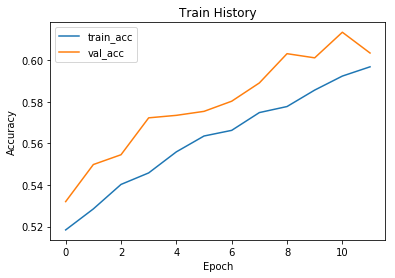

In [25]:
show_train_history('acc','val_acc')

In [27]:
#採用MSE

model.compile(loss = 'MSE', optimizer = 'sgd', metrics = ['accuracy'])

In [28]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split = 0.25, epochs = 12, batch_size = 128, verbose = 1)

#validation_split: 用來指定訓練集的一定比例作為驗證集。 驗證集不參與訓練。
#batch_size:整數或None，每個梯度更新的樣本數。


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0523 - acc: 0.6059 - val_loss: 0.0552 - val_acc: 0.6168
Epoch 2/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.0520 - acc: 0.6060 - val_loss: 0.0551 - val_acc: 0.6166
Epoch 3/12
37500/37500 [==============================] - 131s 3ms/step - loss: 0.0519 - acc: 0.6096 - val_loss: 0.0550 - val_acc: 0.6161
Epoch 4/12
37500/37500 [==============================] - 128s 3ms/step - loss: 0.0518 - acc: 0.6106 - val_loss: 0.0549 - val_acc: 0.6177
Epoch 5/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.0517 - acc: 0.6110 - val_loss: 0.0548 - val_acc: 0.6186
Epoch 6/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0516 - acc: 0.6133 - val_loss: 0.0548 - val_acc: 0.6174
Epoch 7/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0516 - acc: 0.6107 - val_loss: 0.0547 - 

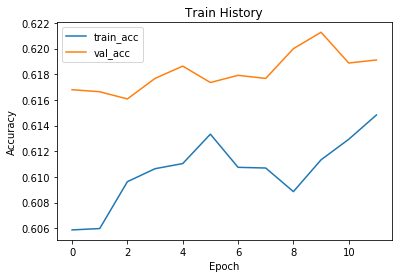

In [29]:
show_train_history('acc', 'val_acc')

In [32]:
#採用binary _crossentropy

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [33]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split = 0.25, epochs = 12, batch_size = 128, verbose = 1)


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 150s 4ms/step - loss: 0.1752 - acc: 0.9309 - val_loss: 0.1868 - val_acc: 0.9263
Epoch 2/12
37500/37500 [==============================] - 176s 5ms/step - loss: 0.1742 - acc: 0.9317 - val_loss: 0.1867 - val_acc: 0.9263
Epoch 3/12
37500/37500 [==============================] - 140s 4ms/step - loss: 0.1748 - acc: 0.9310 - val_loss: 0.1861 - val_acc: 0.9264
Epoch 4/12
37500/37500 [==============================] - 142s 4ms/step - loss: 0.1740 - acc: 0.9315 - val_loss: 0.1860 - val_acc: 0.9266
Epoch 5/12
37500/37500 [==============================] - 133s 4ms/step - loss: 0.1739 - acc: 0.9316 - val_loss: 0.1862 - val_acc: 0.9268
Epoch 6/12
37500/37500 [==============================] - 130s 3ms/step - loss: 0.1730 - acc: 0.9320 - val_loss: 0.1853 - val_acc: 0.9270
Epoch 7/12
37500/37500 [==============================] - 137s 4ms/step - loss: 0.1729 - acc: 0.9317 - val_loss: 0.1853 - 

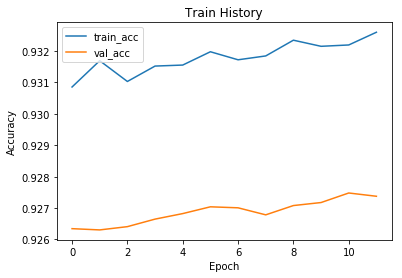

In [34]:
show_train_history('acc','val_acc')